In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

In [21]:
plt.style.use('seaborn-v0_8-pastel')

In [ ]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

In [ ]:

engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}")

In [23]:
sql_travels = f'''

SELECT
    member_accountNumber,
    startStation_id,
    endStation_id,
    startDock_id,
    endDock_id,
    duration,
    bike_id,
    bikeDefect_id,
    distanceInMeters,
    member_birthday,
    member_country,
    member_gender,
    member_postalCode,
    subscriptionId,
    totalDurationMs,
    startTimeMs,
    endTimeMs
FROM BikeRentalFact
WHERE 
    (startTimeMs BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("2025-01-01 00:00:00", "America/Mexico_City", 'UTC'))*1000 
    AND UNIX_TIMESTAMP(CONVERT_TZ("2025-10-31 23:59:59", "America/Mexico_City", 'UTC'))*1000)
    AND NOT ((startStation_id = endStation_id) AND (duration/60 < 2));

'''

df_travels = pd.read_sql(sql_travels, engine)
df_travels

,member_accountNumber,startStation_id,endStation_id,startDock_id,endDock_id,duration,bike_id,bikeDefect_id,distanceInMeters,member_birthday,member_country,member_gender,member_postalCode,subscriptionId,totalDurationMs,startTimeMs,endTimeMs
0,S33JUHC9,356,530,18470,13866,1351,6431,NaN,6050,7.596504e+11,MX,F,03610,452082,1351076,1735711214114,1735712565190
1,DD2W7K22,465,292,12275,7411,258,1749,NaN,689,7.865208e+11,MX,M,06920,683345,258537,1735711269604,1735711528141
2,AZ3M3VMZ,540,456,14020,11540,1157,6212,NaN,4310,8.520120e+11,?,M,?,419168,1157726,1735711249565,1735712407291
3,B2YB53P3,349,349,8849,8849,925,9274,NaN,0,9.236376e+11,MX,M,06400,670236,925588,1735711250636,1735712176224
4,A4QAJUTK,265,418,7189,10810,1548,3370,NaN,3892,5.304312e+11,?,M,?,353671,1548125,1735711253272,1735712801397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16780119,174481,135,352,16704,8861,218,7412,NaN,530,3.750840e+11,MX,M,52789,718265,218325,1761587986362,1761588204687
16780120,G2XSBVWU,373,372,9666,8931,146,3194,NaN,468,1.046758e+12,MX,M,09690,922401,146218,1761587993485,1761588139703
16780121,9TYAAU5U,591,594,15075,15174,147,6177,NaN,378,1.427544e+11,?,F,?,775139,147179,1761588002607,1761588149786
16780122,P8URERH5,355,93,9157,10896,113,5634,NaN,235,9.352152e+11,MX,M,15430,703202,113889,1761588017293,1761588131182


In [24]:
sql_stations = f'''

SELECT 
    id,
    name
FROM BikeStationDim;

'''

df_stations_sql = pd.read_sql(sql_stations, engine)
df_stations_sql.head()

,id,name
0,248,000 2
1,693,0001
2,696,0004
3,701,1014 Prueba Iseo
4,689,1123


In [25]:
# Agregar nombres de estaciones inicio y fin en base a startStation_id	endStation_id del dataframe de df_stations_sql
# Gregar nombre de stacion de inicio y fin
df_stations_start = df_stations_sql.rename(columns={'id': 'startStation_id', 'name': 'startStation_name'})
df_stations_end = df_stations_sql.rename(columns={'id': 'endStation_id', 'name': 'endStation_name'})
df_travels = df_travels.merge(df_stations_start, on='startStation_id', how='left')
df_travels = df_travels.merge(df_stations_end, on='endStation_id', how='left')
df_travels.head()


,member_accountNumber,startStation_id,endStation_id,startDock_id,endDock_id,duration,bike_id,bikeDefect_id,distanceInMeters,member_birthday,member_country,member_gender,member_postalCode,subscriptionId,totalDurationMs,startTimeMs,endTimeMs,startStation_name,endStation_name
0,S33JUHC9,356,530,18470,13866,1351,6431,NaN,6050,7.596504e+11,MX,F,03610,452082,1351076,1735711214114,1735712565190,CE-052 Hidalgo - Trujano,CE-620 Fernando Montes de Oca - Priv. Lago
1,DD2W7K22,465,292,12275,7411,258,1749,NaN,689,7.865208e+11,MX,M,06920,683345,258537,1735711269604,1735711528141,CE-004 Río Nilo - Río Panuco,CE-001 Río Sena-Río Balsas
2,AZ3M3VMZ,540,456,14020,11540,1157,6212,NaN,4310,8.520120e+11,?,M,?,419168,1157726,1735711249565,1735712407291,CE-560 Doctor Liceaga - Eje Central,CE-483 Colegio Salesiano - Marina Nacional
3,B2YB53P3,349,349,8849,8849,925,9274,NaN,0,9.236376e+11,MX,M,06400,670236,925588,1735711250636,1735712176224,CE-549 Sor Juana Ines de la Cruz - Dr. Atl,CE-549 Sor Juana Ines de la Cruz - Dr. Atl
4,A4QAJUTK,265,418,7189,10810,1548,3370,NaN,3892,5.304312e+11,?,M,?,353671,1548125,1735711253272,1735712801397,CE-023 Reforma - Praga,CE-328 Avenida 1-Calle 7


In [26]:
# Viajes promedio por día/semana/mes
df_travels['startTime'] = pd.to_datetime(df_travels['startTimeMs'], unit='ms')
df_travels.set_index('startTime', inplace=True)
daily_travels = df_travels.resample('D').size()
weekly_travels = df_travels.resample('W').size()
monthly_travels = df_travels.resample('M').size()
print(f'Viajes promedio por día: {daily_travels.mean():.2f}')
print(f'Viajes promedio por semana: {weekly_travels.mean():.2f}')
print(f'Viajes promedio por mes: {monthly_travels.mean():.2f}')

C:\Users\victor.briones\AppData\Local\Temp\ipykernel_6200\2452665806.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_travels = df_travels.resample('M').size()


Viajes promedio por día: 55933.75
Viajes promedio por semana: 381366.45
Viajes promedio por mes: 1678012.40


In [27]:
# Duración promedio de viajes

average_duration = df_travels['duration'].mean()
print(f'Duración promedio de viajes: {average_duration:.2f} minutos')


Duración promedio de viajes: 939.41 minutos


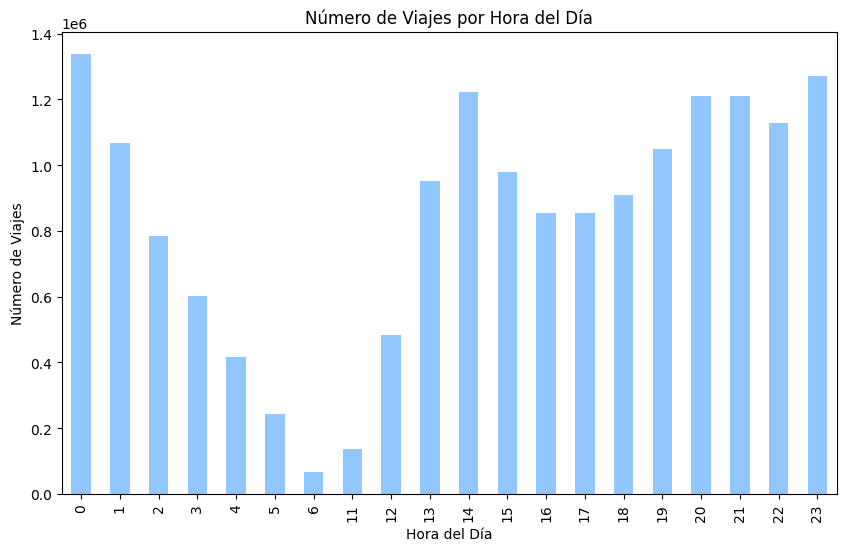

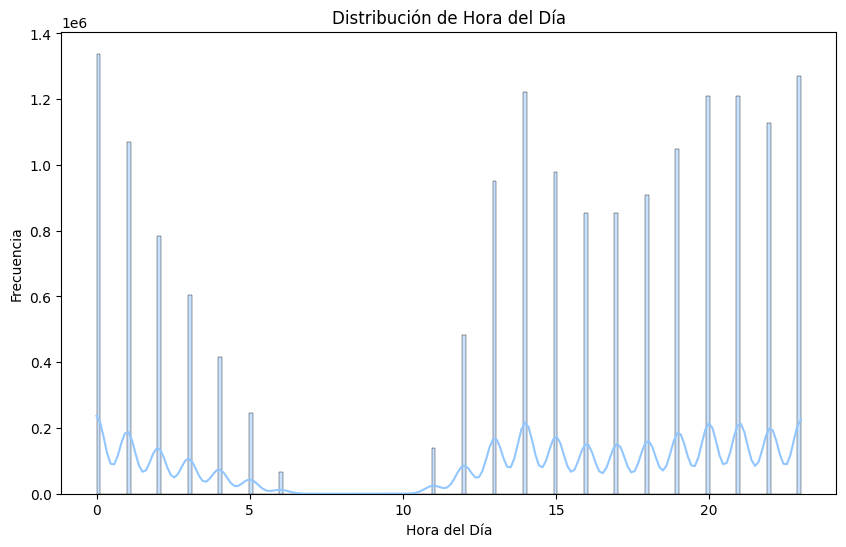

In [28]:
# Crear columnas de fecha y hora del día CORREGIDO
df_travels['start_date'] = pd.to_datetime(df_travels['startTimeMs'], unit='ms')
df_travels['hour_of_day'] = df_travels['start_date'].dt.hour

# Si necesitas la fecha formateada como string para mostrar, crea una columna separada
df_travels['start_date_formatted'] = df_travels['start_date'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Análisis de viajes por hora del día
hourly_travels = df_travels.groupby('hour_of_day').size()
plt.figure(figsize=(10, 6))
hourly_travels.plot(kind='bar')
plt.title('Número de Viajes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df_travels['hour_of_day'], kde=True)
plt.title('Distribución de Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
df_travels.head()

,member_accountNumber,startStation_id,endStation_id,startDock_id,endDock_id,duration,bike_id,bikeDefect_id,distanceInMeters,member_birthday,...,member_postalCode,subscriptionId,totalDurationMs,startTimeMs,endTimeMs,startStation_name,endStation_name,start_date,hour_of_day,start_date_formatted
startTime,,,,,,,,,,,,,,,,,,,,,
2025-01-01 06:00:14.114,S33JUHC9,356,530,18470,13866,1351,6431,NaN,6050,7.596504e+11,...,03610,452082,1351076,1735711214114,1735712565190,CE-052 Hidalgo - Trujano,CE-620 Fernando Montes de Oca - Priv. Lago,2025-01-01 06:00:14.114,6,01-01-2025 06:00:14
2025-01-01 06:01:09.604,DD2W7K22,465,292,12275,7411,258,1749,NaN,689,7.865208e+11,...,06920,683345,258537,1735711269604,1735711528141,CE-004 Río Nilo - Río Panuco,CE-001 Río Sena-Río Balsas,2025-01-01 06:01:09.604,6,01-01-2025 06:01:09
2025-01-01 06:00:49.565,AZ3M3VMZ,540,456,14020,11540,1157,6212,NaN,4310,8.520120e+11,...,?,419168,1157726,1735711249565,1735712407291,CE-560 Doctor Liceaga - Eje Central,CE-483 Colegio Salesiano - Marina Nacional,2025-01-01 06:00:49.565,6,01-01-2025 06:00:49
2025-01-01 06:00:50.636,B2YB53P3,349,349,8849,8849,925,9274,NaN,0,9.236376e+11,...,06400,670236,925588,1735711250636,1735712176224,CE-549 Sor Juana Ines de la Cruz - Dr. Atl,CE-549 Sor Juana Ines de la Cruz - Dr. Atl,2025-01-01 06:00:50.636,6,01-01-2025 06:00:50
2025-01-01 06:00:53.272,A4QAJUTK,265,418,7189,10810,1548,3370,NaN,3892,5.304312e+11,...,?,353671,1548125,1735711253272,1735712801397,CE-023 Reforma - Praga,CE-328 Avenida 1-Calle 7,2025-01-01 06:00:53.272,6,01-01-2025 06:00:53


In [30]:
# Horarios pico de uso

peak_hours = hourly_travels.sort_values(ascending=False).head(3)
print('Horas pico de uso:')
for hour, count in peak_hours.items():
    print(f'Hora: {hour}:00 - Viajes: {count}')
# Análisis de estaciones más utilizadas
start_station_counts = df_travels['startStation_name'].value_counts().head(5)
end_station_counts = df_travels['endStation_name'].value_counts().head(5)
print('Estaciones de inicio más utilizadas:')
for station, count in start_station_counts.items():
    print(f'Estación ID: {station} - Viajes: {count}')
print('Estaciones de fin más utilizadas:')
for station, count in end_station_counts.items():
    print(f'Estación ID: {station} - Viajes: {count}')# Análisis de estaciones más utilizadas
df_travels.head()

Horas pico de uso:
Hora: 0:00 - Viajes: 1338265
Hora: 23:00 - Viajes: 1271776
Hora: 14:00 - Viajes: 1221923
Estaciones de inicio más utilizadas:
Estación ID: CE-271-272 Jesús García - Carlos J. Meneses - Viajes: 117688
Estación ID: CE-548 Dr. Mariano Azuela - Jose Antonio Alzate - Viajes: 97693
Estación ID: CE-027 Reforma- Havre - Viajes: 94587
Estación ID: CE-064 Sonora - Ámsterdam - Viajes: 88792
Estación ID: CE-237-238 Andrés Bello-George Eliot - Viajes: 79689
Estaciones de fin más utilizadas:
Estación ID: CE-271-272 Jesús García - Carlos J. Meneses - Viajes: 208979
Estación ID: CE-014 Reforma - Río de Plata - Viajes: 113793
Estación ID: CE-548 Dr. Mariano Azuela - Jose Antonio Alzate - Viajes: 107597
Estación ID: CE-027 Reforma- Havre - Viajes: 98993
Estación ID: CE-064 Sonora - Ámsterdam - Viajes: 92950


,member_accountNumber,startStation_id,endStation_id,startDock_id,endDock_id,duration,bike_id,bikeDefect_id,distanceInMeters,member_birthday,...,member_postalCode,subscriptionId,totalDurationMs,startTimeMs,endTimeMs,startStation_name,endStation_name,start_date,hour_of_day,start_date_formatted
startTime,,,,,,,,,,,,,,,,,,,,,
2025-01-01 06:00:14.114,S33JUHC9,356,530,18470,13866,1351,6431,NaN,6050,7.596504e+11,...,03610,452082,1351076,1735711214114,1735712565190,CE-052 Hidalgo - Trujano,CE-620 Fernando Montes de Oca - Priv. Lago,2025-01-01 06:00:14.114,6,01-01-2025 06:00:14
2025-01-01 06:01:09.604,DD2W7K22,465,292,12275,7411,258,1749,NaN,689,7.865208e+11,...,06920,683345,258537,1735711269604,1735711528141,CE-004 Río Nilo - Río Panuco,CE-001 Río Sena-Río Balsas,2025-01-01 06:01:09.604,6,01-01-2025 06:01:09
2025-01-01 06:00:49.565,AZ3M3VMZ,540,456,14020,11540,1157,6212,NaN,4310,8.520120e+11,...,?,419168,1157726,1735711249565,1735712407291,CE-560 Doctor Liceaga - Eje Central,CE-483 Colegio Salesiano - Marina Nacional,2025-01-01 06:00:49.565,6,01-01-2025 06:00:49
2025-01-01 06:00:50.636,B2YB53P3,349,349,8849,8849,925,9274,NaN,0,9.236376e+11,...,06400,670236,925588,1735711250636,1735712176224,CE-549 Sor Juana Ines de la Cruz - Dr. Atl,CE-549 Sor Juana Ines de la Cruz - Dr. Atl,2025-01-01 06:00:50.636,6,01-01-2025 06:00:50
2025-01-01 06:00:53.272,A4QAJUTK,265,418,7189,10810,1548,3370,NaN,3892,5.304312e+11,...,?,353671,1548125,1735711253272,1735712801397,CE-023 Reforma - Praga,CE-328 Avenida 1-Calle 7,2025-01-01 06:00:53.272,6,01-01-2025 06:00:53


In [31]:
# Rutas más populares
df_travels['route'] = df_travels['startStation_name'] + ' a ' + df_travels['endStation_name']
route_counts = df_travels['route'].value_counts().head(5)
print('Rutas más populares:')
for route, count in route_counts.items():
    print(f'Ruta: {route} - Viajes: {count}')



Rutas más populares:
Ruta: CE-621 Lago Poniente - Calzada de Tlalpan a CE-618 Bartolomé R. Salido - Edzna - Viajes: 9800
Ruta: CE-618 Bartolomé R. Salido - Edzna a CE-621 Lago Poniente - Calzada de Tlalpan - Viajes: 6943
Ruta: CE-548 Dr. Mariano Azuela - Jose Antonio Alzate a CE-498 de los Maestros - Plan de Agua Prieta - Viajes: 6508
Ruta: CE-495 Amado Nervo - de los Maestros a CE-498 de los Maestros - Plan de Agua Prieta - Viajes: 6068
Ruta: CE-494 Tláloc - Calzada México Tacuba a CE-486 Izcoatl - Circuito Interior Melchor Ocampo - Viajes: 6036


In [32]:
# Distancia promedio recorrida

average_distance = df_travels['distanceInMeters'].mean()
print(f'Distancia promedio recorrida: {average_distance:.2f} metros')


df_travels['distanceInMeters'].describe()


Distancia promedio recorrida: 1879.28 metros


count    1.678012e+07
mean     1.879278e+03
std      1.418536e+03
min      0.000000e+00
25%      8.710000e+02
50%      1.488000e+03
75%      2.528000e+03
max      1.365400e+04
Name: distanceInMeters, dtype: float64